# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import pandas as pd


plt.rcParams.update({'font.size': 22})

# Solutions

## Exercise 08.1


I aim to estimate the expectation value of the quantum Hamiltonian for a single particle in one dimension using the **Variational Monte Carlo (VMC)** method. Specifically, I want to compute:

$$
\langle \hat{H} \rangle_T = 
\frac{\int dx\, \Psi_T^*(x) \hat{H} \Psi_T(x)}
{\int dx\, |\Psi_T(x)|^2} = 
\int dx\, \frac{|\Psi_T(x)|^2}{\int dx\, |\Psi_T(x)|^2} \cdot \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)}
$$

This method involves:
- a **trial wave function** $\Psi_T^{\sigma,\mu}(x)$ with variational parameters:

    the trial wave function is chosen as a **symmetric superposition of two Gaussians**, centered at $\pm \mu$:

    $$
    \Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x - \mu)^2}{2\sigma^2}} + e^{-\frac{(x + \mu)^2}{2\sigma^2}}
    $$

- sampling using the **Metropolis algorithm** with a uniform transition probability $T(x_{\text{new}} | x_{\text{old}})$:
    new positions $x_{\text{new}}$ are proposed with a **uniform distribution** in the interval:

    $$
    x_{\text{new}} = x_{\text{old}} + \text{Uniform}(-\delta, \delta)
    $$

    The transition probability is then:

    $$
    A(x_{\text{old}} \rightarrow x_{\text{new}}) = \min\left(1,\ \frac{|\Psi_T(x_{\text{new}})|^2}{|\Psi_T(x_{\text{old}})|^2} \right)
    $$

    This ensures detailed balance with a symmetric proposal distribution.
- computing the **local energy**:

    $$
    E_L(x) = \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)} = -\frac{1}{2} \frac{\partial^2_x \Psi_T(x)}{\Psi_T(x)} + V(x)
    $$

    with $\hbar = 1$ and $m = 1$.


    I compute its second derivative analytically as:

    $$
    \frac{d^2}{dx^2} \Psi_T(x) = 
    \left[ \left( \frac{(x - \mu)^2}{\sigma^4} - \frac{1}{\sigma^2} \right) e^{-\frac{(x - \mu)^2}{2\sigma^2}} + 
        \left( \frac{(x + \mu)^2}{\sigma^4} - \frac{1}{\sigma^2} \right) e^{-\frac{(x + \mu)^2}{2\sigma^2}} 
    \right]
    $$

    This expression is used to compute the local energy in the Monte Carlo sampling.




### Parameter tuning

To obtain reliable results, it is essential to determine:
- the system's **equilibration time**,
- the **autocorrelation function** to choose a proper block size for data blocking.

I performed a preliminary simulation using the following parameters:
- $\sigma = 0.5$
- $\mu = 1$
- $\delta = 1.2$ (Metropolis step size), which yields an acceptance rate of approximately 50%.

To study equilibration and autocorrelation, I simulated 2000 Monte Carlo steps of the system.

In addition to plotting the instantaneous energy values, I also plotted the cumulative average to monitor the convergence of the estimated energy over time. Cumulative average smooths energy fluctuations and provides a more reliable indication of whether the sampling has stabilized.



As shown in the figure below, the energy reaches equilibrium quickly, nevertheless I conservatively discard the first **1000** steps to ensure complete equilibration.
From the autocorrelation plot, I observe that the correlation drops to zero after less than **20** steps. Therefore, I choose a **block size larger than 200** (roughly 10 times the autocorrelation time) to ensure statistically independent blocks for error estimation.




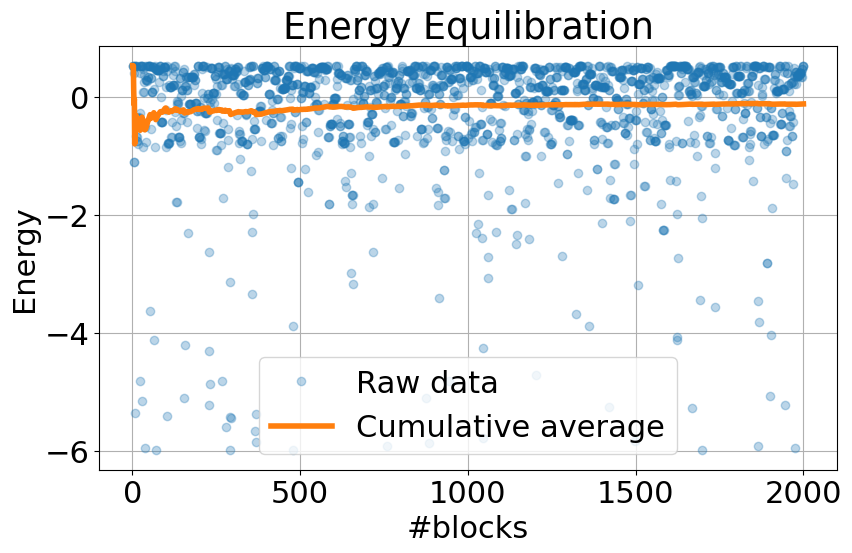

In [7]:
# def moving_average(data, window_size):
#     cumsum = np.cumsum(data)
#     cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
#     return cumsum[window_size - 1:] / window_size

en = np.loadtxt('es_08.1/EQ/OUTPUT/energy.dat', skiprows=1)

plt.figure(figsize=(9,6))
plt.plot(en[:,0], en[:,1], 'o', label='Raw data', alpha=0.3)
# window_size = 50
# plt.plot(np.arange(window_size-1, len(en),1) , moving_average(en[:,1], window_size), label='Moving average', lw=3)
plt.plot(en[:,0], en[:,2], lw=4, label='Cumulative average')
plt.title('Energy Equilibration')
plt.xlabel('#blocks')
plt.ylabel('Energy')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

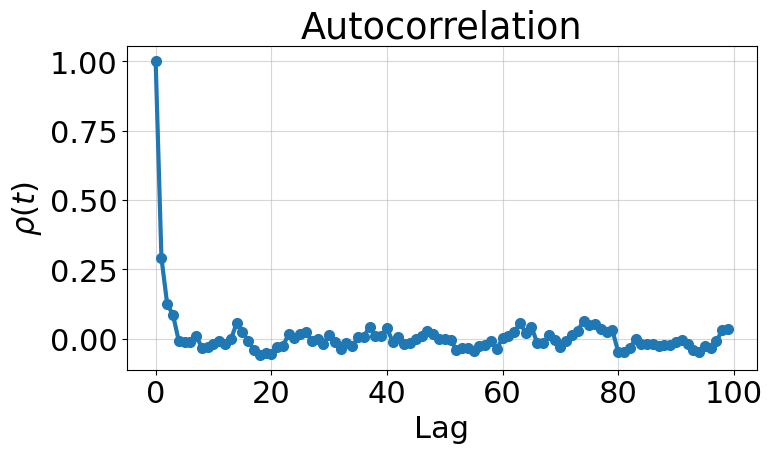

In [ ]:
def autocorr(m, t):
    N = len(m)
    avg1 = np.mean(m[:N - t] * m[t:])
    avg2 = np.mean(m[:N - t]) * np.mean(m[t:])

    numerator = avg1 - avg2

    # Parte inferiore (varianza)
    variance = np.mean(m[:N - t]**2) - (np.mean(m[:N - t]))**2
    var = np.var(m[:N - t])

    return numerator / var  

max_lag = 100

A_MD = en[:, 1]
rho_MD = [autocorr(A_MD, lag) for lag in range(max_lag)]

plt.figure(figsize=(9, 6))
plt.plot(rho_MD, marker='o', markersize=7, linestyle='-', linewidth=3)
plt.xlabel("Lag")
plt.ylabel(r"$\rho(t)$")
plt.grid(True,  alpha=0.5)
plt.title("Autocorrelation")
plt.tight_layout()
plt.show()



### Energy estimation using data blocking

Using the chosen parameters (**1000 equilibration steps** and a **block size of 1000**), I performed the estimation of the variational energy by applying **data blocking** over **50 blocks** (total of 50,000 sampled points after equilibration).
I plotted the **cumulative average** of the energy $\langle E \rangle$ together with its associated **error bars**, computed from the block averages. 
The plot also includes a horizontal line representing the **theoretical energy**, calculated analytically for the same values of $\mu = 1$ and $\sigma = 0.5$, providing a benchmark for comparison.

The results clearly show that the estimated energy converges towards the theoretical value, with the statistical uncertainty under control thanks to the data blocking procedure.




In [27]:
mu = 1.0
sigma = 0.5
x = np.linspace(-5, 5, 1001) 

def psi_T(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) + np.exp(-(x + mu)**2 / (2 * sigma**2))

def laplacian_psi_T(x, mu, sigma):
    a = np.exp(-(x - mu)**2 / (2 * sigma**2)) * ((x - mu)**2 - sigma**2)
    b = np.exp(-(x + mu)**2 / (2 * sigma**2)) * ((x + mu)**2 - sigma**2)
    return (a + b) / sigma**4

psi = psi_T(x, mu, sigma)
norm = simpson(psi**2, x)
psi2 = psi**2 / norm
laplacian = laplacian_psi_T(x, mu, sigma)
kinetic = -0.5 * laplacian / psi

potential = - 5./2. * x**2 + x**4

local_energy = kinetic + potential

E = simpson(psi2 * local_energy, x)

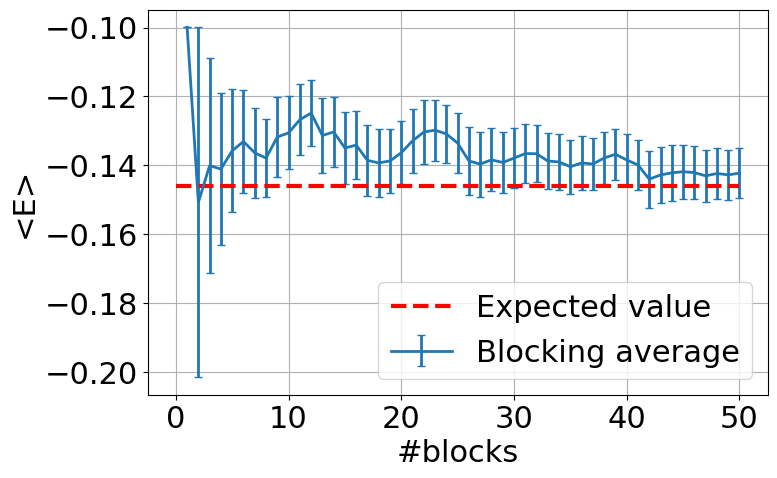

In [28]:
en = np.loadtxt('es_08.1/SIM/OUTPUT/energy.dat', skiprows=1)

plt.figure(figsize=(8,5))
plt.errorbar(en[:,0], en[:,2],yerr= en[:,3], capsize=3, lw=2, label='Blocking average')
plt.xlabel('#blocks')
plt.ylabel('<E>')
plt.hlines(E, 0, 50, colors='r', linestyles='dashed', label='Expected value', lw=3)
plt.grid(True)
plt.legend()
plt.show()


## Exercise 08.2


The goal of this exercise is to optimize the variational parameters $\mu$ and $\sigma$ in order to minimize the expectation value of the Hamiltonian $\langle \hat{H} \rangle_T$, using the Variational Monte Carlo (VMC) framework introduced previously.

To tackle this variational optimization problem, I extend the VMC code by implementing a Simulated Annealing (SA) algorithm.
This algorithm explores the parameter space $(\mu, \sigma)$ by stochastic updates, guided by a temperature schedule that controls the acceptance of uphill moves (i.e., moves that temporarily increase the energy).

The optimization targets the same variational energy functional as in the first exercise, with the same trial wave function

$$
\Psi_T^{\sigma, \mu}(x) \propto e^{-\frac{(x - \mu)^2}{2\sigma^2}} + e^{-\frac{(x + \mu)^2}{2\sigma^2}}
$$

The aim is to find the optimal $(\mu, \sigma)$ values that minimize:

$$
\langle \hat{H} \rangle_T = \frac{\int dx\, \Psi_T^*(x) \hat{H} \Psi_T(x)}{\int dx\, |\Psi_T(x)|^2}
$$

with the variational energy estimated via data blocking and statistical error control as introduced in the previous exercise.

### Key choices and parameters:

- **Initial temperature:** $T = 2$
- **Cooling schedule:** $T \to \alpha \cdot T$, with $\alpha = 0.99$
- **Parameter updates:**
  - $\mu \to \mu + \text{Uniform}(-STEP_{\mu}, +STEP_{\mu})$, with $STEP_{\mu} = 0.5$
  - $\sigma \to \sigma + \text{Uniform}(-STEP_{\sigma}, +STEP_{\sigma})$, with $STEP_{\sigma} = 0.25$
  - Only positive values of $\sigma$ are accepted (negative $\sigma$ proposals are rejected).
  - Since the trial wave function is symmetric, I restrict $\mu \geq 0$ without loss of generality.
  
- **Monte Carlo settings per SA step:**
  - For each SA step, I perform 50 blocks of 1000 steps each, to estimate $\langle \hat{H} \rangle_T$ reliably.
  - For the first temperature only, I perform 1000 equilibration steps to ensure proper thermalization.
  - For subsequent temperatures, no additional equilibration is performed, as small changes in $T$ do not significantly affect the equilibrium.

- **Acceptance criterion (Metropolis):** 
  - Moves that lower $\langle \hat{H} \rangle_T$ are always accepted.
  - Moves that increase $\langle \hat{H} \rangle_T$ are accepted with probability $\exp(-\Delta E / T)$.

- **Stopping conditions:**
  - **Maximum number of SA steps:** 500
  - **Early stopping:** If no improvement of the minimum energy is observed for 100 consecutive SA steps, the simulation is stopped early, and the best configuration found so far is taken as the final result.
  - At each step, I keep track of the configuration with the lowest energy found.


To assess the effectiveness of the Simulated Annealing (SA) optimization and to validate the quality of the obtained variational parameters, I present a series of plots illustrating both the optimization process and the physical results.



The first two plots show the behavior of the estimated variational energy $\langle \hat{H} \rangle_T$ (with statistical uncertainties) and the trajectory of the SA algorithm in the $(\mu, \sigma)$ parameter space as a function of the SA steps.

As expected, the energy systematically decreases with the SA steps and eventually converges to a minimum, demonstrating the ability of the SA algorithm to effectively navigate the variational parameter space and lower the energy.
While from the second plot it is evident that the algorithm explores the space efficiently and samples well the region corresponding to the minimum of the energy. The trajectory tends to stabilize around the optimal set of parameters found by the optimization.



C:\Users\Utente\AppData\Local\Temp\ipykernel_22792\3828974226.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_sa = pd.read_csv('es_08.2/OUTPUT/sa_trajectory.dat', delim_whitespace=True, skiprows=1, names=['T', 'mu', 'sigma', 'E', 'err_E', 'acceptance', 'best_E'])


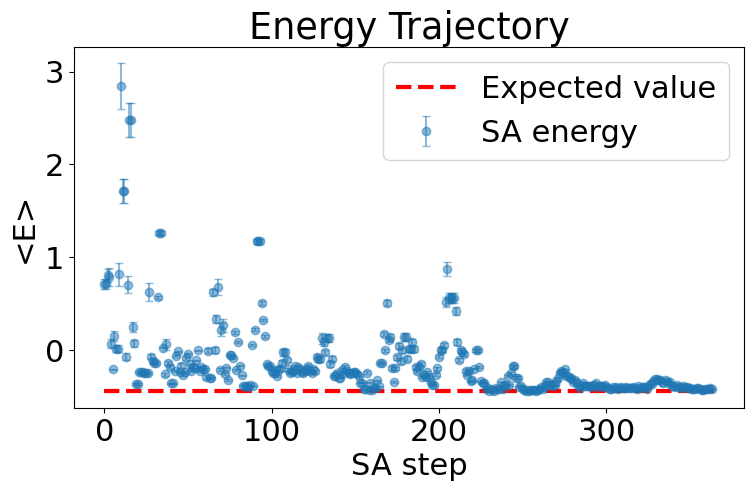

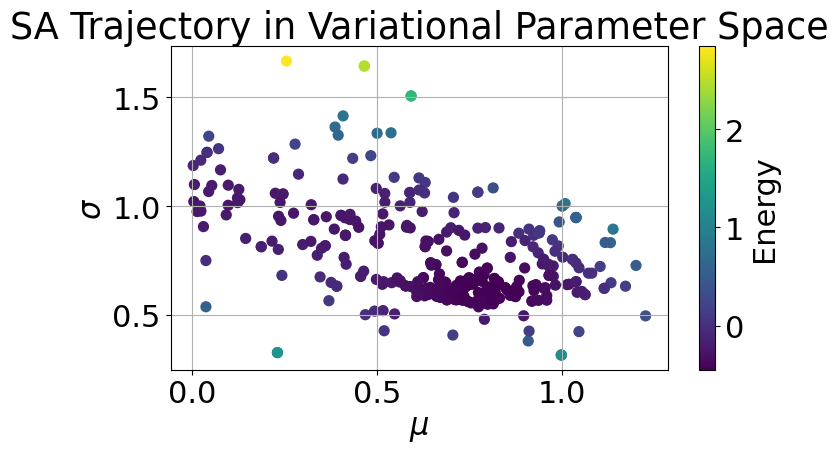

In [41]:
df_sa = pd.read_csv('es_08.2/OUTPUT/sa_trajectory.dat', delim_whitespace=True, skiprows=1, names=['T', 'mu', 'sigma', 'E', 'err_E', 'acceptance', 'best_E'])

# plot E with err_E in function of SA step
plt.figure(figsize=(8, 5))
plt.errorbar(df_sa.index, df_sa['E'], yerr=df_sa['err_E'], fmt='o', capsize=3, alpha = 0.5, label='SA energy')
plt.hlines(df_sa.E.min(), 0, len(df_sa), colors='r', linestyles='dashed', label='Expected value', lw=3)
plt.xlabel('SA step')
plt.ylabel('<E>')
plt.legend()
plt.tight_layout()
plt.title('Energy Trajectory')
plt.show()


# show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
# use a colormap to show the energy
plt.figure(figsize=(8, 5))
# for c use the decreasing energy
plt.scatter(df_sa['mu'], df_sa['sigma'], c=df_sa['E'], cmap='viridis', s=50)
plt.colorbar(label='Energy')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title('SA Trajectory in Variational Parameter Space')
plt.grid(True)
plt.tight_layout()
plt.show()


Ground state energy:  -0.46046587969271546
1st excited state energy:  0.09742471331760956
2nd excited state energy:  1.9717331343930202


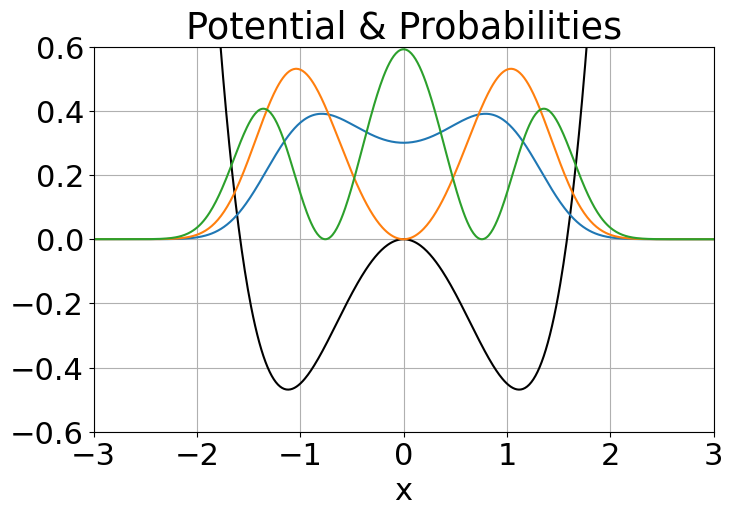

In [33]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Once the optimal parameters $(\mu_{\text{opt}}, \sigma_{\text{opt}})$ have been found, I performed a new, independent VMC simulation to estimate $\langle \hat{H} \rangle_T$ with high statistical precision.

In this case, I applied data blocking from scratch to compute the progressive averages and associated error bars as a function of the number of blocks (or MC steps). I perform 50 blocks of 1000 steps each. The corresponding plot shows that the estimated variational energy remains slightly above the exact ground state energy, computed independently using the matrix discretization method of the Schrödinger equation.

This discrepancy is expected due to inherent computational limitations of the method, including:
- the finite number of Monte Carlo steps (statistical noise),
- possible limitations of the chosen variational ansatz (the trial wave function may not fully capture the exact ground state),
- residual autocorrelations despite careful block analysis.


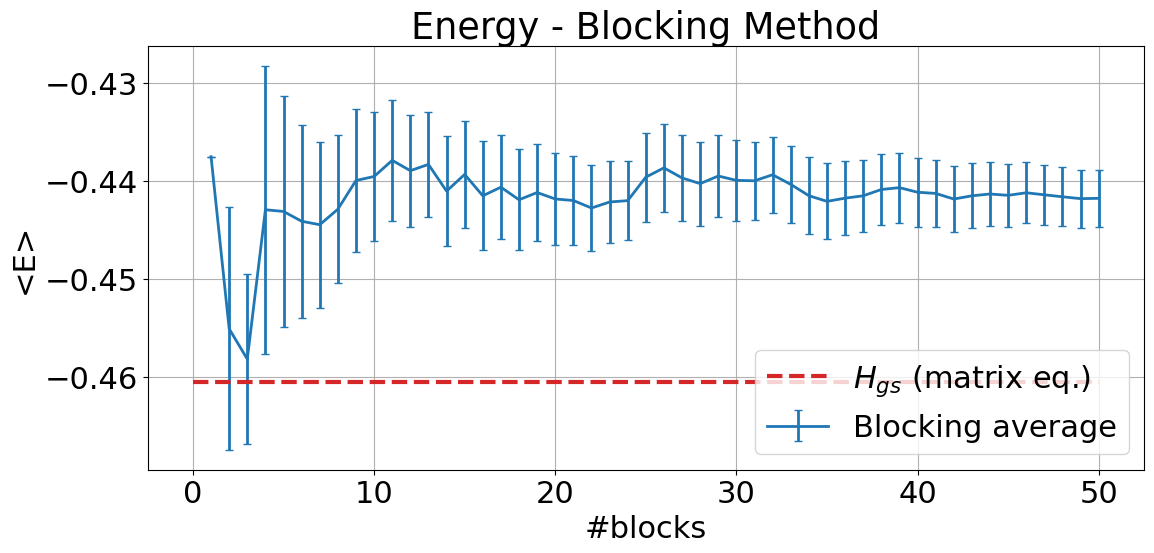

In [38]:
en = np.loadtxt('es_08.2/OUTPUT/energy.dat')

plt.figure(figsize=(12,6))
plt.errorbar(en[:,0], en[:,2],yerr= en[:,3], capsize=3, lw=2, label='Blocking average')
plt.xlabel('#blocks')
plt.ylabel('<E>')
#plt.hlines(E_par, 0, 50, colors='r', linestyles='dashed', label='Expected value <E_par>', lw=3)
plt.hlines(E[0], 0, 50, ls='dashed', colors='tab:red', label=r'$H_{gs}$ (matrix eq.)', lw = 3)
plt.grid(True)
plt.legend()
plt.title('Energy - Blocking Method')
plt.tight_layout()
plt.show()


Finally, I compare the sampled probability density $|\Psi_T(x)|^2$ (obtained via Monte Carlo sampling with the optimized parameters) with:
- the analytic expression of $|\Psi_T(x)|^2$, compute with optimal parameters: $ \mu=0.82, \sigma=0.6$ from SA, and
- the numerical ground state probability density obtained by solving the Schrödinger equation with the matrix method.

The plot shows a good agreement among the three curves, with some visible deviations, which can be attributed to:
- finite sampling statistics in the Monte Carlo,
- approximation errors in the variational wave function,
- discretization effects in the matrix-based numerical solution.

Nevertheless, the overall qualitative and quantitative agreement confirms the reliability of the Variational Monte Carlo approach for estimating both energies and probability densities.


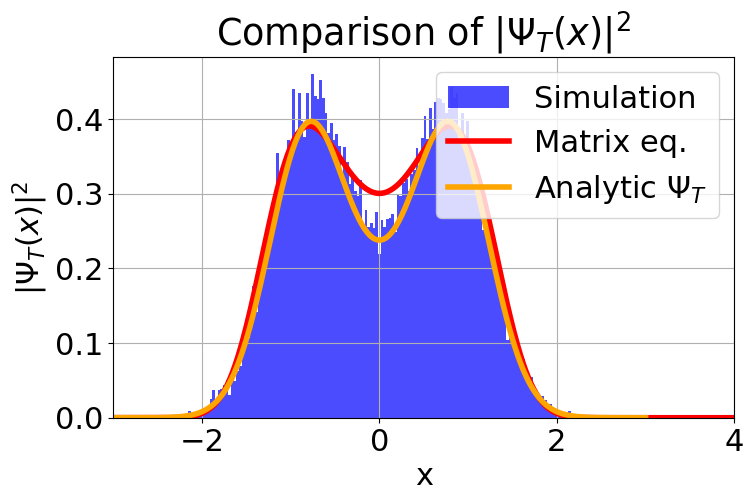

In [39]:
# show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of 
# $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation


# Definition of the trial wave function used for plotting analytical results
def TWF(x, mu, sigma):
    return (np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) + np.exp((-(x + mu) ** 2 / (2 * sigma ** 2)))) ** 2


x = np.linspace(-a/2, a/2, N)

positions = np.loadtxt('es_08.2/OUTPUT/x.dat')
plt.figure(figsize=(8, 5))
plt.hist(positions, density=True, bins=np.linspace(-3, 3, 200), label='Simulation', color='blue', alpha=0.7)
plt.plot(x, (psi[0]) ** 2, color='red', label='Matrix eq.', lw=4)
plt.plot(np.linspace(-3, 3, 200), (1 / (1.5 * np.sqrt(np.pi))) * TWF(np.linspace(-3, 3, 200), 0.818749, 0.602897),
         color='orange', label=r'Analytic $\Psi_T$', lw=4)
plt.legend(loc = 'upper right')
plt.xlabel('x')
plt.ylabel(r'$|\Psi_T(x)|^2$')
plt.grid(True)

plt.xlim(-3, 4)

plt.tight_layout()
plt.title(r'Comparison of $|\Psi_T(x)|^2$')
plt.show()

